<AxesSubplot:title={'center':'Shark Attacks per year'}>

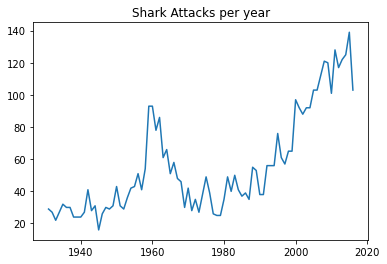

In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\HP\Desktop\数据挖掘\attacks.csv", encoding = "ISO-8859-1")
df['Year_cleaned'] = df[df['Year']>1930]['Year']
Years_values = df['Year_cleaned'].value_counts().sort_index()

%matplotlib inline
Years_values.plot(title="Shark Attacks per year")

遇难者年龄

<AxesSubplot:title={'center':'Age of victims'}>

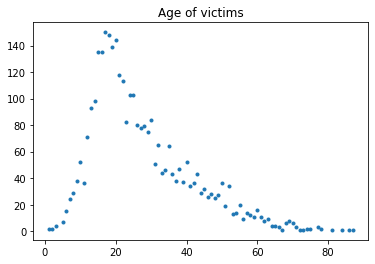

In [3]:
#Kommentar: Alter der angegriffenen Menschen
df['Age_Clean'] = df['Age'].str.extract("([0-9]+)", expand=False).dropna().astype(int)
age_values = df['Age_Clean'].value_counts().sort_index()
age_values.plot(style=".",title = "Age of victims")

<AxesSubplot:>

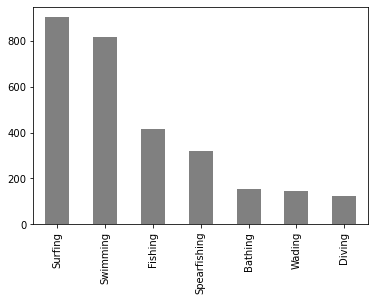

In [4]:
df.groupby("Activity")\
  .filter(lambda x: len(x) > 100)\
  .Activity.value_counts()\
  .plot.bar(color='grey')

<AxesSubplot:>

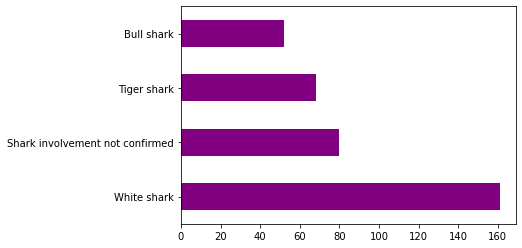

In [5]:
sharks = df['Species '].value_counts()
sharks[sharks>50].plot.barh(color='purple')

<AxesSubplot:title={'center':'Gender of victims'}, ylabel='Sex '>

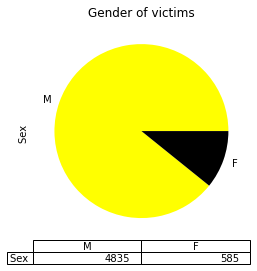

In [6]:
df[df['Sex '].isin(['M','F'])]["Sex "].value_counts().plot(kind='pie',title= "Gender of victims",colors= ['yellow','black'], table =True)

<AxesSubplot:title={'center':'Was the attack fatal?'}>

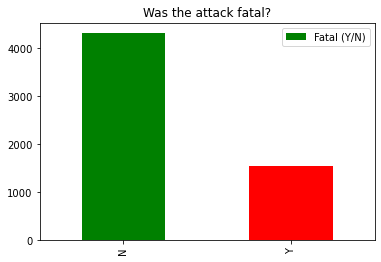

In [7]:
df[df['Fatal (Y/N)'].isin(['Y','N'])]["Fatal (Y/N)"].value_counts()\
    .plot(kind='bar', title= "Was the attack fatal?",legend = True, color= ['green','red'])

<AxesSubplot:title={'center':'Time of attack.'}, ylabel='Frequency'>

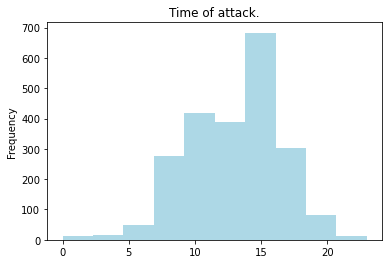

In [8]:
df['Hour_Clean'] = df['Time'].str.extract("([0-9]+)", expand=False).dropna().astype(int)
df['Hour_Clean']= df[df['Hour_Clean']<25]['Hour_Clean']
df['Hour_Clean'].plot(kind='hist', color='lightblue', title= "Time of attack.")

<AxesSubplot:>

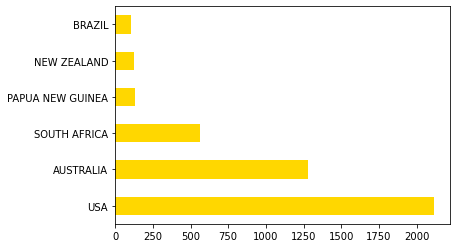

In [9]:
df.groupby("Country")\
  .filter(lambda x: len(x) > 100)\
  .Country.value_counts()\
  .plot.barh(color='gold')

<AxesSubplot:xlabel='Month'>

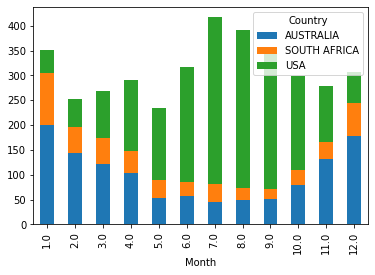

In [10]:
df['Month'] = df['Case Number'].str.extract("\.([0-9]+)\.", expand=False).dropna().astype(int)
df['Month'] = df[(df['Month']>0) & ( df['Month']<13)]['Month']
df.groupby("Country").filter(lambda x: len(x) > 300)\
  .groupby(["Country","Month"])\
  .size().to_frame().unstack(level="Country")[0].plot.bar(stacked=True)

<AxesSubplot:title={'center':'Where do what species attack?'}, ylabel='Species '>

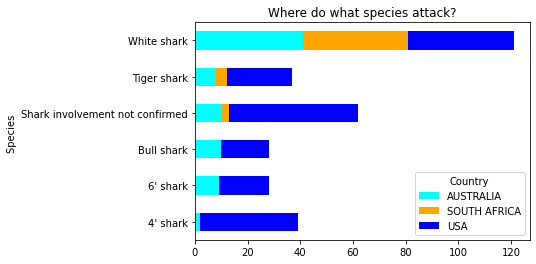

In [11]:
df.groupby("Species ").filter(lambda x: len(x) > 35)\
  .groupby("Country").filter(lambda x: len(x) > 20)\
  .groupby(["Country","Species "])\
  .size().to_frame().unstack(level=0)[0].plot.barh(title= "Where do what species attack?",stacked=True,color=['aqua','orange','blue'])

<AxesSubplot:title={'center':'What months are the deadliest?'}, xlabel='Month'>

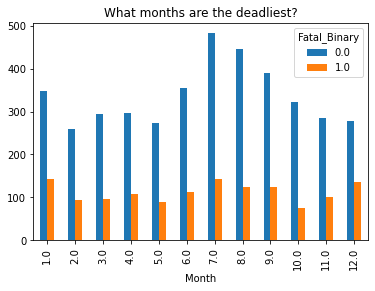

In [12]:
df['Fatal_Binary'] = df[df['Fatal (Y/N)'].isin(['Y','N'])]['Fatal (Y/N)']
df['Fatal_Binary'] = df['Fatal_Binary'].str.replace('N',"0").str.replace('Y',"1").dropna().astype(int)
df.groupby(["Month","Fatal_Binary"])\
  .size().to_frame().unstack(level="Fatal_Binary")[0].plot.bar(title= "What months are the deadliest?")

<AxesSubplot:title={'center':'Death by species'}, xlabel='Fatal_Binary'>

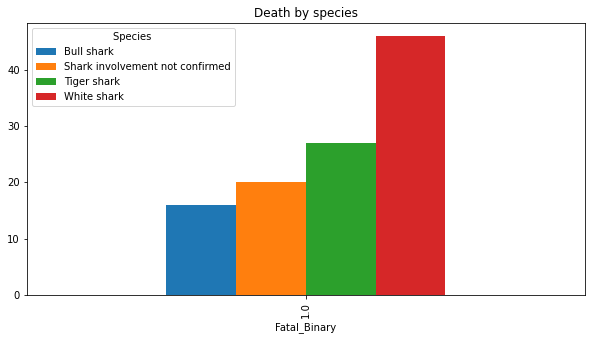

In [13]:
# Kommentar: Tode durch Spezies verursacht
df[df["Fatal_Binary"]==1]\
  .groupby("Species ").filter(lambda x: len(x) > 10)\
  .groupby(["Species ","Fatal_Binary"])\
  .size().to_frame().unstack(level=0)[0].plot.bar(title='Death by species',figsize=[10,5])

<AxesSubplot:title={'center':'Which activities are most fatal?'}, xlabel='Fatal_Binary'>

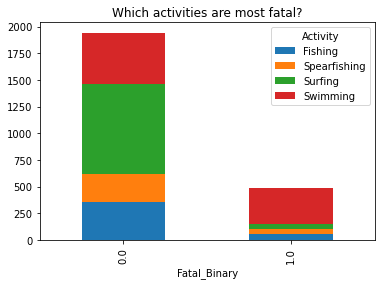

In [14]:
df\
  .groupby("Activity").filter(lambda x: len(x) > 300)\
  .groupby(["Activity","Fatal_Binary"])\
  .size().to_frame().unstack(level=0)[0].plot.bar(stacked=True, title = "Which activities are most fatal?")